## Linear Regression Bike Sharing Assignment By Saurabh Mudgal ##

### 1. Data Sourcing ###

### a. Importing Libraries and Reading the Data ###

In [1]:
#Filtering out the warning messages

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the required libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#day.csv contains all the information of Bike Sharing company 

bike = pd.read_csv('day.csv')

### b. Data Inspection ###

In [4]:
#Shape(rows , columns) of the day.csv

bike.shape

(730, 16)

In [5]:
#Info of the day.csv data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#describe data of day.csv

bike.describe(include=np.number)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#To increase the row  and column count in display

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [8]:
#view data of day.csv

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Data Cleaning and Manipulation ###

In bike dataset , we have following columns:

- Categorical Columns : season, mnth , weeday, weathersit
- Numerical Columns : windspeed, temp, atemp, humidity, cnt
- Binary Columns: yr, holiday, workingday

so, seeing the data we can think of drpping below columns:

- instant : It just has the serial numbers.
- dteday : This information is already available in yr and mnth columns.
- casual : Since our target variable is cnt columns and that already has the casual count.
- registered : Since our target variable is cnt columns and that already has the registered count.

In [9]:
#Dropping the columns

col_drop = ["instant", "dteday", "casual", "registered"]
bike = bike.drop(columns=col_drop, axis=1)

In [10]:
#Correction in the column names

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [11]:
#shape after cleaning and renaming the columns

bike.shape

(730, 12)

In [12]:
#View data after changing the Column names

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#Check null Values

bike.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

There seems no null values in data

### Mapping the categorical variables  ###

Season Column has below values:
- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [14]:
bike['season'] = bike['season'].map({1: 'spring',2 : 'summer', 3 : 'fall' ,4: 'winter'})


year column has below values:

- 0: 2018
- 1: 2019

In [15]:
bike['year'] = bike['year'].map({0: '2018', 1: '2019'})

month column has below values:

- 1: Jan
- 2: Feb
- 3: Mar
- 4: Apr
- 5: May
- 6: Jun
- 7: Jul
- 8: Aug
- 9: Sep
- 10: Oct
- 11: Nov
- 12: Dec

In [16]:
bike['month']= bike['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

weekday column has below values:

- 0: Sunday
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thursday
- 5: Friday
- 6: Saturday

In [17]:
bike['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

weathersit column has below values:

- 1: clear
- 2: mist and cloudy
- 3: light snow and rain
- 4: heavy snow and rain

In [18]:
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2 : 'mist and cloudy', 3 : 'light snow and rain' , 4: 'heavy snow and rain'})


In [19]:
#View data

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Monday,1,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### 3. Exploratory Data Analysis ###

#### Since 'count' is our target variable , so we are going to analysis on other variables with respect to target variable ####

#### Visualising Numeric Variables ####

Let's make a pairplot of all the numeric variables

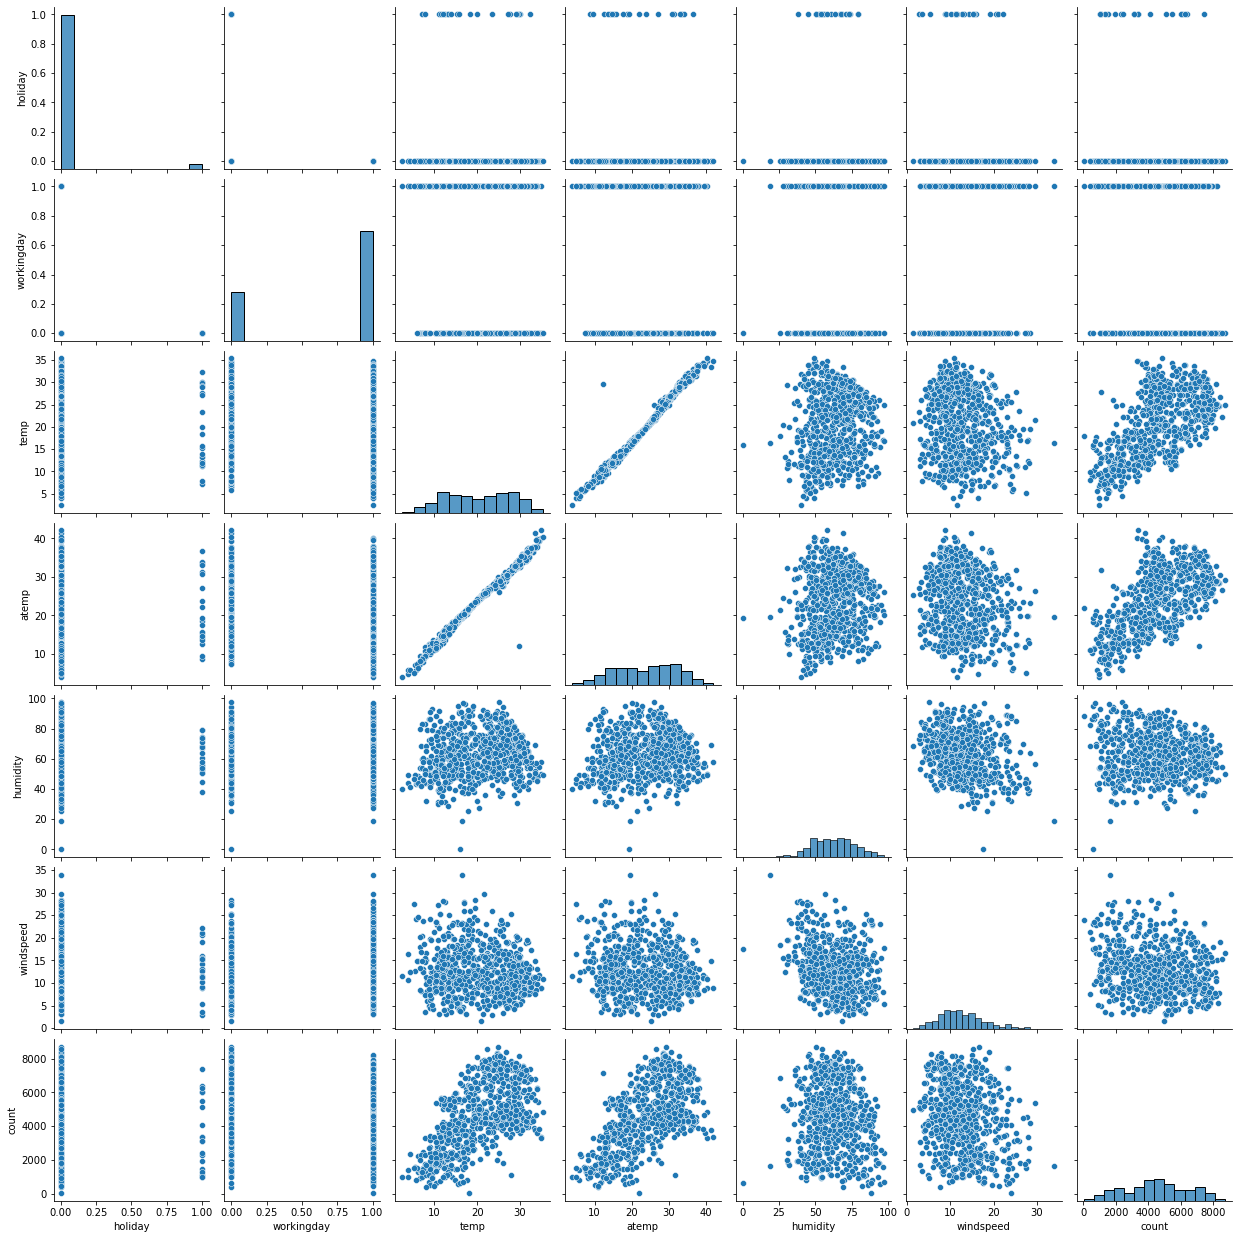

In [20]:
#pair plot

sns.pairplot(bike)
plt.show()

There are few categorical variables as well. Let's make a boxplot for some of these variables.

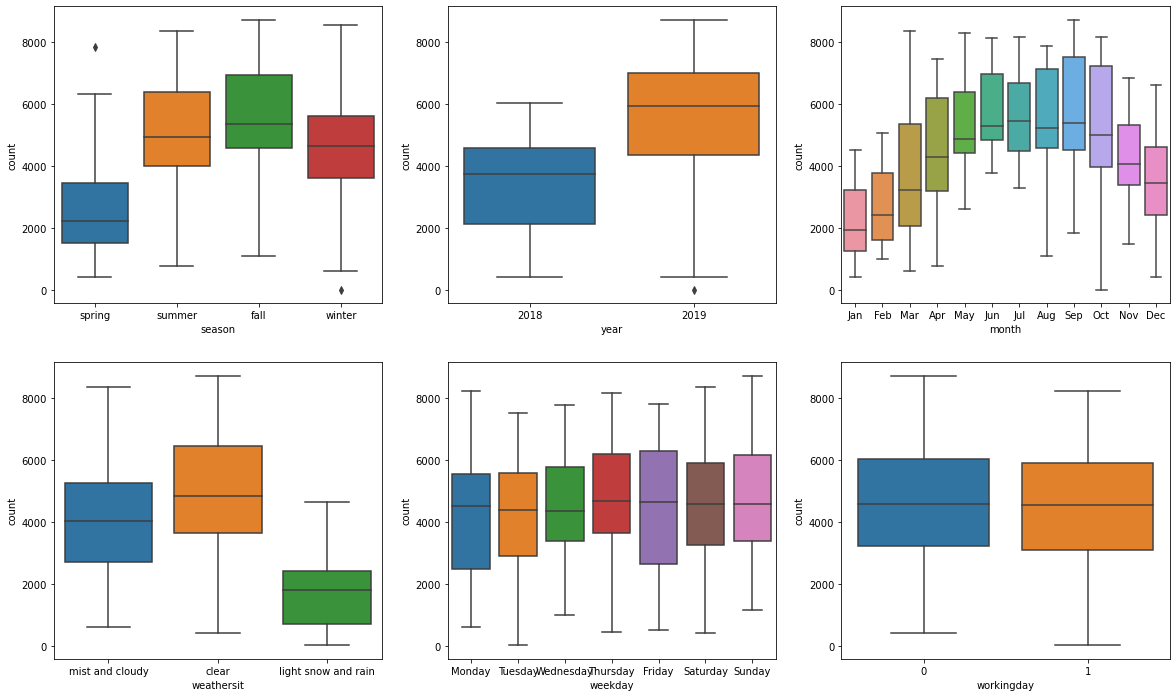

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.show()

<b> There doesn't seem to be outliers with any of the categorical variable. </b>

Let's now visualize individual category againt the target variable:


### - season ###


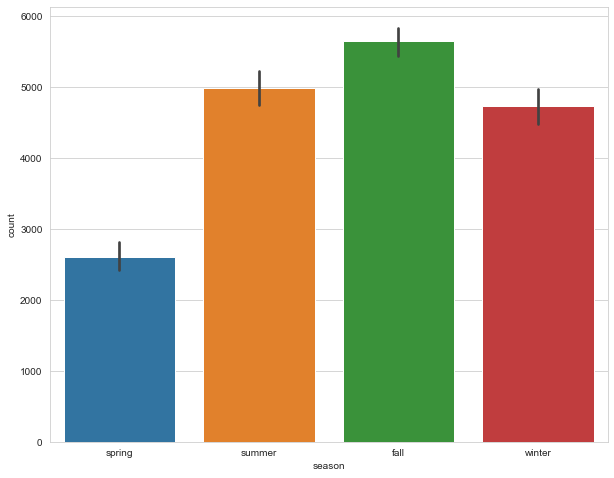

In [22]:
#popularity/demand in different seasons

plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='season', y='count', data=bike)
plt.show()

#### Seeing the barplot , we can say that in Fall season people used rented bikes more ####

### - year ###

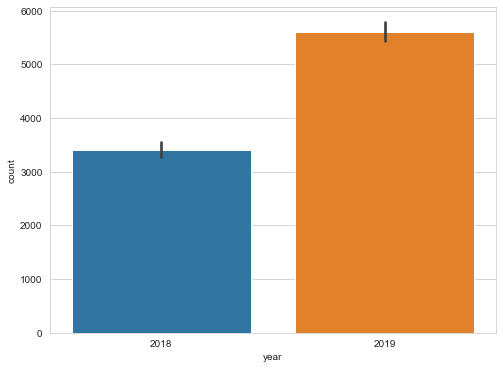

In [23]:
#popularity/demand in 2018 and 2019

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(x='year', y='count', data=bike)
plt.show()

#### Seeing the chart, we can say that in 2019 people used rented bikes more in comparison to 2018 ####

### - month ###

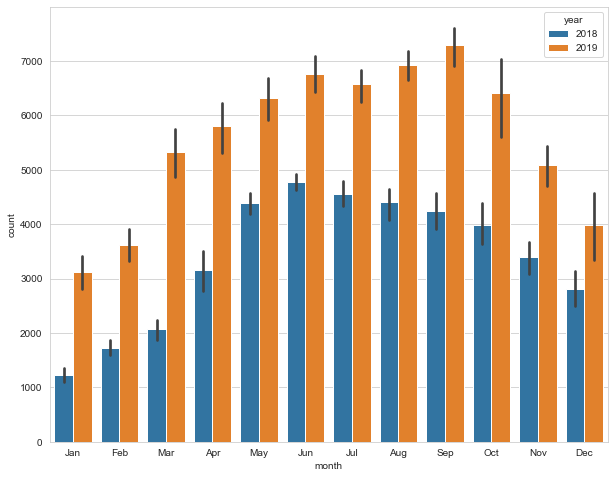

In [24]:
#popularity/demand in different months

plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='month', y='count', hue='year', data=bike)
plt.show()

#### month of September in 2019 people used rented bikes the most , August 2019 comes second in the list ####

### - weather ###

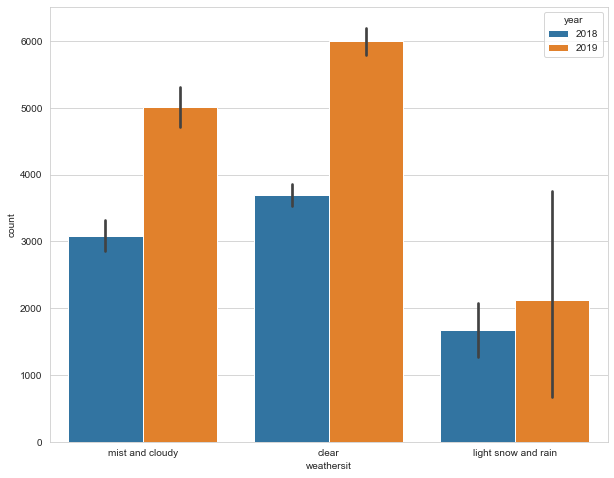

In [25]:
#popularity/demand in different weathers

plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='weathersit', y='count', hue='year', data=bike)
plt.show()

#### in Clear weather for both 2018 and 2019  people used the rented bikes most. ####

### - weekday ###

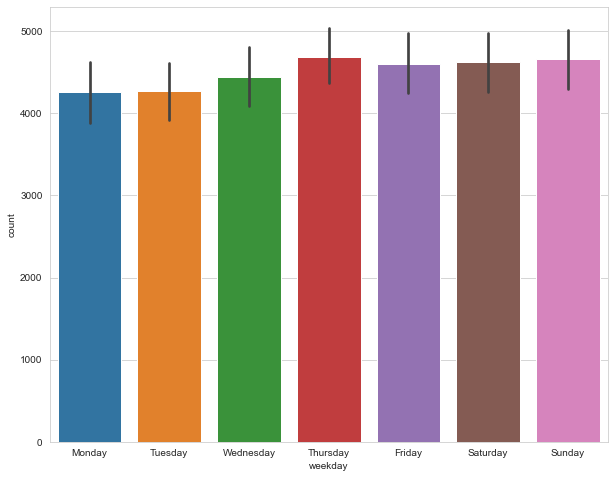

In [26]:
#popularity/demand on different days of the week

plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='weekday', y='count', data=bike)
plt.show()

#### On Thursdays people used the rented bikes most, Sunday and Saturday come at 2nd and 3rd position respectively #### 

### - workingday ###

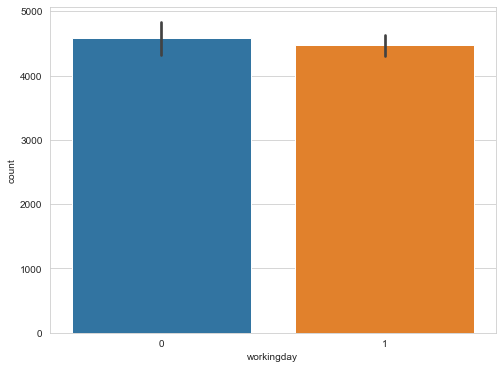

In [27]:
#popularity/demand on working days and non-working days

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(x='workingday', y='count', data=bike)
plt.show()

#### people rented bike more on working days. ####

### Now let's check the variables which are continous ###

### Pair Plot between continous variables('temp', 'atemp', 'humidity', 'windspeed') against 'count' variable ###

<Figure size 720x576 with 0 Axes>

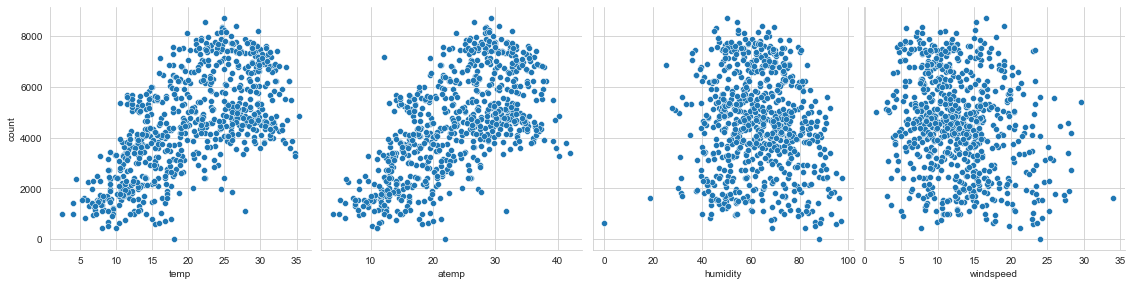

In [28]:
#pair plot between continous variables and target variable

plt.figure(figsize=(10, 8))
sns.pairplot(bike,x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars='count', size=4, aspect=1)
plt.show()

Observations:

- <b>count </b> which is our target variable for bike rental <b>shows POSITIVE correlation with temp and a temp variables</b>, which means as the temp increases bike rental count also increases.

- <b>count </b> shows NEGATIVE correlation with <b>humidity variables</b>, which means as the humidity increases bike rental count goes down.

- <b>count </b> shows NEGATIVE correlation with <b> windspeed variables</b>, which means as the temp increases bike rental count count also goes down.


### Correlation among all the variables for bike dataset: ###

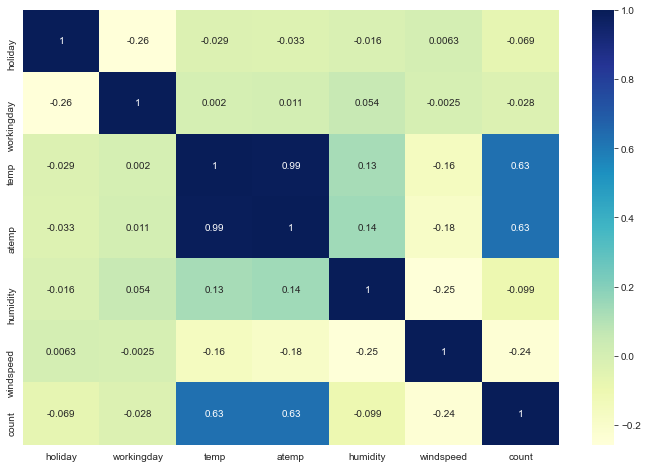

In [29]:
#heatmap to draw the correlation among all the variables

plt.figure(figsize=(12,8))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

<b>Observation:

As it can be seen that temp and atemp are two variables which have high correlation value 0.99  that means they are  highly correlated with each other, We can drop one of them.</b>

In [30]:
#Dropping 'atemp'

bike = bike.drop('atemp', axis=1)

In [31]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Monday,1,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


### 3. Data Preparation ###

Let's create dummy variables for the Categorical variables(season, year, month, weathersit, weekday):


In [32]:
#Create the dummy variables for categorical variables(month, season, weathersit, weekday):

season_status = pd.get_dummies(bike['season'], drop_first = True, prefix= 'season')

year_status = pd.get_dummies(bike['year'], drop_first = True, prefix= 'year')

month_status = pd.get_dummies(bike['month'], drop_first = True, prefix= 'month')

weathersit_status = pd.get_dummies(bike['weathersit'], drop_first = True, prefix= 'weather')

weekday_status = pd.get_dummies(bike['weekday'], drop_first = True, prefix= 'weekday')


In [33]:
#Now add the newly created dummy variables into the bike dataframe:

bike = pd.concat([bike, season_status, year_status, month_status, weathersit_status, weekday_status], axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weather_light snow and rain,weather_mist and cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,spring,2018,Jan,0,Monday,1,mist and cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,spring,2018,Jan,0,Tuesday,1,mist and cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Since we have new dummy variables , we can drop the original categorical variables:

bike = bike.drop(['season', 'year', 'month', 'weathersit', 'weekday'], axis=1)

In [35]:
#shape of new dataframe
bike.shape

(730, 29)

In [36]:
#Info after adding the dummy variables and dropping the categorical values

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   holiday                      730 non-null    int64  
 1   workingday                   730 non-null    int64  
 2   temp                         730 non-null    float64
 3   humidity                     730 non-null    float64
 4   windspeed                    730 non-null    float64
 5   count                        730 non-null    int64  
 6   season_spring                730 non-null    uint8  
 7   season_summer                730 non-null    uint8  
 8   season_winter                730 non-null    uint8  
 9   year_2019                    730 non-null    uint8  
 10  month_Aug                    730 non-null    uint8  
 11  month_Dec                    730 non-null    uint8  
 12  month_Feb                    730 non-null    uint8  
 13  month_Jan           

### Splitting the data into training and testing sets ###

In [37]:
#import train_test library

from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)

In [38]:
#shape of train and test dataset

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescalling the features ###

In [39]:
# import MinMaxScaler for scaling  from sklearn library

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
#apply scaler to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weather_light snow and rain,weather_mist and cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


### Dividing into X and Y sets for the model building ###

In [41]:
y_train = bike_train.pop('count')
X_train = bike_train

### Building the model ###

We will be using the <b>LinearRegression function from SciKit Learn for it compatibility with RFE(Recursive Feature Elimination)</b>

In [42]:
#import RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
#Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             #running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
#we will use rfe.support_ which will tell us if RFE selects the variable or not
# and
# rfe.ranking_ will tell us if the next best variable to be selected and rank accordingly 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 11),
 ('month_Mar', False, 14),
 ('month_May', False, 8),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1),
 ('weather_light snow and rain', True, 1),
 ('weather_mist and cloudy', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10)]

In [45]:
#Let's look at the columns selected by RFE

col = X_train.columns[rfe.support_] #columns to select
col

Index(['holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'year_2019', 'month_Dec', 'month_Jan',
       'month_Jul', 'month_Nov', 'month_Sep', 'weather_light snow and rain',
       'weather_mist and cloudy'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_] #columns to drop

Index(['workingday', 'month_Aug', 'month_Feb', 'month_Jun', 'month_Mar',
       'month_May', 'month_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel , for the detailed statistics ###

In [47]:
#creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [48]:
#import statsmodels api for adding a constant variable

import statsmodels.api as sm
X_train_rfe  = sm.add_constant(X_train_rfe)

In [49]:
#Let's run the linear model1

lm1 = sm.OLS(y_train, X_train_rfe).fit()

In [50]:
lm1.params

const                          0.319667
holiday                       -0.091089
temp                           0.481503
humidity                      -0.162213
windspeed                     -0.188726
season_spring                 -0.061255
season_summer                  0.042337
season_winter                  0.101921
year_2019                      0.230404
month_Dec                     -0.035461
month_Jan                     -0.043411
month_Jul                     -0.055250
month_Nov                     -0.038701
month_Sep                      0.075467
weather_light snow and rain   -0.246481
weather_mist and cloudy       -0.054300
dtype: float64

### Model-1 ###

In [51]:
#Let's see the summary of our linear model

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        18:39:58   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3197      0.036      8.859      0.000       0.249       0.391
holiday                        -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                            0.4815      0.037     13.005      0.000       0.409       0.554
humidity                       -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                      -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring                  -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                   0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                   0.1019      0.018      5.656      0.000       0.067       0.137
year_2019                       0.2304      0.008     28.487      0.000       0.215       0.246
month_Dec                      -0.0355      0.018     -2.024      0.043      -0.070      -0.001
month_Jan                      -0.0434      0.018     -2.393      0.017      -0.079      -0.008
month_Jul                      -0.0553      0.018     -3.030      0.003      -0.091      -0.019
month_Nov                      -0.0387      0.019     -2.057      0.040      -0.076      -0.002
month_Sep                       0.0755      0.017      4.466      0.000       0.042       0.109
weather_light snow and rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weather_mist and cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Observatoin:
In the above model, as per the pvalues all the listed variables are significant.
</b>

<b> let's now calculate VIF(Variance Inflation Factor): </b>

In [52]:
#Import VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

#calculate VIF for new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
0,const,82.52
5,season_spring,5.27
2,temp,4.42
7,season_winter,3.83
6,season_summer,2.77
3,humidity,1.92
12,month_Nov,1.77
10,month_Jan,1.68
15,weather_mist and cloudy,1.57
9,month_Dec,1.50


<b> It's clearly visible that const is very high, so we can drop the const. </b>

In [53]:
#drop the const variable

X_train_new = X_train_rfe.drop(['const'], axis=1)

Rebuilding the model without const

### Model-2 ###

In [54]:
#statsmodels api after dropping constant variable

X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm2 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        18:39:58   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3197      0.036      8.859      0.000       0.249       0.391
holiday                        -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                            0.4815      0.037     13.005      0.000       0.409       0.554
humidity                       -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                      -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring                  -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                   0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                   0.1019      0.018      5.656      0.000       0.067       0.137
year_2019                       0.2304      0.008     28.487      0.000       0.215       0.246
month_Dec                      -0.0355      0.018     -2.024      0.043      -0.070      -0.001
month_Jan                      -0.0434      0.018     -2.393      0.017      -0.079      -0.008
month_Jul                      -0.0553      0.018     -3.030      0.003      -0.091      -0.019
month_Nov                      -0.0387      0.019     -2.057      0.040      -0.076      -0.002
month_Sep                       0.0755      0.017      4.466      0.000       0.042       0.109
weather_light snow and rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weather_mist and cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Observatoin:
In the above model, as per the pvalues listed for all the variables are significant.
</b>

In [55]:
#calculate VIF for new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
2,humidity,30.89
1,temp,17.79
3,windspeed,4.72
4,season_spring,4.37
6,season_winter,4.06
5,season_summer,2.82
14,weather_mist and cloudy,2.32
7,year_2019,2.09
11,month_Nov,1.85
9,month_Jan,1.75


<b> It's clearly visible that humidity is very high, so we can drop the humidity variable. </b>

In [56]:
#drop the humidity variable

X_train_new = X_train_new.drop(['humidity'], axis=1)

Rebuilding the model without humidity

### Model-3 ###

In [57]:
#statsmodels api after dropping humidity variable

import statsmodels.api as sm
X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm3 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.75e-186
Time:                        18:39:58   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2450      0.032      7.618      0.000       0.182       0.308
holiday                        -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                            0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                      -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_spring                  -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer                   0.0349      0.015      2.251      0.025       0.004       0.065
season_winter                   0.0869      0.018      4.831      0.000       0.052       0.122
year_2019                       0.2345      0.008     28.687      0.000       0.218       0.251
month_Dec                      -0.0428      0.018     -2.413      0.016      -0.078      -0.008
month_Jan                      -0.0500      0.018     -2.719      0.007      -0.086      -0.014
month_Jul                      -0.0500      0.019     -2.703      0.007      -0.086      -0.014
month_Nov                      -0.0395      0.019     -2.064      0.040      -0.077      -0.002
month_Sep                       0.0687      0.017      4.015      0.000       0.035       0.102
weather_light snow and rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weather_mist and cloudy        -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Observatoin:
In the above model, as per the pvalues all the listed variables are significant.
</b>

In [58]:
#calculate VIF for new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
5,season_winter,2.95
3,season_spring,2.89
4,season_summer,2.24
6,year_2019,2.07
10,month_Nov,1.81
8,month_Jan,1.66
9,month_Jul,1.59
13,weather_mist and cloudy,1.57


<b> It's clearly visible that temp is high but it has positive correlation with our target variable, so we can drop the windspeed variable for which VIF is quite close to 5 and coeeficient is also negative</b>

In [59]:
#drop the windspeed variable

X_train_new = X_train_new.drop(['windspeed'], axis=1)

Rebuilding the model without windspeed

### Model-4 ###

In [60]:
#statsmodels api after dropping windspeed variable

X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm4 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.35e-179
Time:                        18:39:58   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1837      0.032      5.775      0.000       0.121       0.246
holiday                        -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp                            0.4624      0.037     12.346      0.000       0.389       0.536
season_spring                  -0.0830      0.022     -3.734      0.000      -0.127      -0.039
season_summer                   0.0266      0.016      1.661      0.097      -0.005       0.058
season_winter                   0.0902      0.019      4.834      0.000       0.054       0.127
year_2019                       0.2332      0.008     27.496      0.000       0.217       0.250
month_Dec                      -0.0332      0.018     -1.810      0.071      -0.069       0.003
month_Jan                      -0.0333      0.019     -1.765      0.078      -0.070       0.004
month_Jul                      -0.0512      0.019     -2.663      0.008      -0.089      -0.013
month_Nov                      -0.0415      0.020     -2.091      0.037      -0.081      -0.003
month_Sep                       0.0739      0.018      4.167      0.000       0.039       0.109
weather_light snow and rain    -0.3060      0.025    -12.014      0.000      -0.356      -0.256
weather_mist and cloudy        -0.0787      0.009     -8.707      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Summer seems to have high p-value, so it's better we remove season_summer variable

</b>

In [61]:
#drop the season_summer variable

X_train_new = X_train_new.drop(['season_summer'], axis=1)

Rebuilding the model without summer

### Model-5 ###

In [62]:
#statsmodels api after dropping season_summer variable

X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm5 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.47e-179
Time:                        18:39:58   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2196      0.023      9.390      0.000       0.174       0.266
holiday                        -0.0935      0.027     -3.453      0.001      -0.147      -0.040
temp                            0.4335      0.033     13.046      0.000       0.368       0.499
season_spring                  -0.1084      0.016     -6.691      0.000      -0.140      -0.077
season_winter                   0.0710      0.015      4.835      0.000       0.042       0.100
year_2019                       0.2337      0.008     27.520      0.000       0.217       0.250
month_Dec                      -0.0387      0.018     -2.139      0.033      -0.074      -0.003
month_Jan                      -0.0381      0.019     -2.035      0.042      -0.075      -0.001
month_Jul                      -0.0624      0.018     -3.465      0.001      -0.098      -0.027
month_Nov                      -0.0472      0.020     -2.405      0.017      -0.086      -0.009
month_Sep                       0.0621      0.016      3.814      0.000       0.030       0.094
weather_light snow and rain    -0.3073      0.026    -12.048      0.000      -0.357      -0.257
weather_mist and cloudy        -0.0784      0.009     -8.670      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#calculate VIF for new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
1,temp,3.04
3,season_winter,2.53
4,year_2019,2.05
2,season_spring,1.93
8,month_Nov,1.79
6,month_Jan,1.65
11,weather_mist and cloudy,1.53
5,month_Dec,1.46
7,month_Jul,1.34
9,month_Sep,1.20


<b> After seeing the regression result , we can say p-value of Jan is quite close to 5%. Also it has negative coefficient. It's good to remove the month_Jan </b>

In [64]:
#drop the Jan variable

X_train_new = X_train_new.drop(['month_Jan'], axis=1)

Rebuilding the model without month_Jan

### Model-6 ###

In [65]:
#statsmodels api after dropping Jan variable

X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm6 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.70e-180
Time:                        18:39:59   Log-Likelihood:                 481.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     498   BIC:                            -888.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2081      0.023      9.141      0.000       0.163       0.253
holiday                        -0.0945      0.027     -3.477      0.001      -0.148      -0.041
temp                            0.4517      0.032     14.068      0.000       0.389       0.515
season_spring                  -0.1164      0.016     -7.384      0.000      -0.147      -0.085
season_winter                   0.0715      0.015      4.850      0.000       0.043       0.100
year_2019                       0.2331      0.009     27.382      0.000       0.216       0.250
month_Dec                      -0.0306      0.018     -1.731      0.084      -0.065       0.004
month_Jul                      -0.0662      0.018     -3.685      0.000      -0.102      -0.031
month_Nov                      -0.0428      0.020     -2.189      0.029      -0.081      -0.004
month_Sep                       0.0613      0.016      3.759      0.000       0.029       0.093
weather_light snow and rain    -0.3044      0.026    -11.918      0.000      -0.355      -0.254
weather_mist and cloudy        -0.0792      0.009     -8.738      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       74.104   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.250
Skew:                          -0.705   Prob(JB):                     9.91e-46
Kurtosis:                       5.787   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Import VIF library

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
1,temp,2.99
3,season_winter,2.51
4,year_2019,2.05
7,month_Nov,1.79
10,weather_mist and cloudy,1.51
5,month_Dec,1.42
6,month_Jul,1.33
2,season_spring,1.29
8,month_Sep,1.20
9,weather_light snow and rain,1.07


<b> After seeing the regression result , we can say p-value of month_Dec is quite higher than 5%. Also it has negative coefficient. It's good to remove the month_Dec </b>

In [67]:
#drop the month_Dec variable

X_train_new = X_train_new.drop(['month_Dec'], axis=1)

Rebuilding the model without month_Dec

### Model-7 ###

In [68]:
#statsmodels api after dropping month_Dec variable

X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm7 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.18e-180
Time:                        18:39:59   Log-Likelihood:                 480.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     499   BIC:                            -892.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2000      0.022      8.959      0.000       0.156       0.244
holiday                        -0.0950      0.027     -3.491      0.001      -0.149      -0.042
temp                            0.4630      0.032     14.696      0.000       0.401       0.525
season_spring                  -0.1151      0.016     -7.296      0.000      -0.146      -0.084
season_winter                   0.0623      0.014      4.521      0.000       0.035       0.089
year_2019                       0.2333      0.009     27.350      0.000       0.217       0.250
month_Jul                      -0.0681      0.018     -3.787      0.000      -0.103      -0.033
month_Nov                      -0.0303      0.018     -1.665      0.096      -0.066       0.005
month_Sep                       0.0632      0.016      3.874      0.000       0.031       0.095
weather_light snow and rain    -0.3010      0.026    -11.796      0.000      -0.351      -0.251
weather_mist and cloudy        -0.0788      0.009     -8.673      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       69.791   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.767
Skew:                          -0.680   Prob(JB):                     4.58e-41
Kurtosis:                       5.625   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Import VIF library

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
1,temp,2.99
4,year_2019,2.05
3,season_winter,1.89
6,month_Nov,1.58
9,weather_mist and cloudy,1.51
5,month_Jul,1.33
2,season_spring,1.25
7,month_Sep,1.20
0,holiday,1.06
8,weather_light snow and rain,1.06


<b> After seeing the regression result , we can say p-value of month_Nov is quite higher than 5% and quite close to 10%. Also, it has negative coefficient. It's good to remove the month_Nov </b>

In [70]:
#drop the month_Nov variable

X_train_new = X_train_new.drop(['month_Nov'], axis=1)

Rebuilding the model without month_Nov

### Model-8 ###

In [71]:
#statsmodels api after dropping month_Nov variable

X_train_lm  = sm.add_constant(X_train_new)

#Let's run the linear model

lm8 = sm.OLS(y_train, X_train_lm).fit()

#Let's see the summary of our linear model

lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.25e-181
Time:                        18:39:59   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1952      0.022      8.802      0.000       0.152       0.239
holiday                        -0.1006      0.027     -3.716      0.000      -0.154      -0.047
temp                            0.4695      0.031     14.995      0.000       0.408       0.531
season_spring                  -0.1122      0.016     -7.143      0.000      -0.143      -0.081
season_winter                   0.0534      0.013      4.197      0.000       0.028       0.078
year_2019                       0.2332      0.009     27.291      0.000       0.216       0.250
month_Jul                      -0.0690      0.018     -3.833      0.000      -0.104      -0.034
month_Sep                       0.0654      0.016      4.015      0.000       0.033       0.097
weather_light snow and rain    -0.2993      0.026    -11.717      0.000      -0.349      -0.249
weather_mist and cloudy        -0.0781      0.009     -8.594      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       66.632   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.465
Skew:                          -0.661   Prob(JB):                     5.85e-38
Kurtosis:                       5.515   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Import VIF library

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
1,temp,2.99
4,year_2019,2.05
8,weather_mist and cloudy,1.51
3,season_winter,1.33
5,month_Jul,1.33
2,season_spring,1.25
6,month_Sep,1.19
7,weather_light snow and rain,1.06
0,holiday,1.04



<b> F-Statistics </b>

The higher the value of F-Statistics means more significantthe model is.

- F-statistic:	271.9
- Prob (F-statistic):	2.83e-186

Also, 271.9 value of F-Statistics which is greater than 1 and the value of Prob (F-statistic):	2.83e-186 which is very low show that model is significant.


<b> Model 8 is our final model: </b>
    
- R-squared for training set : <b> 0.822 (82%)</b>

- Adjusted R-square for training set : <b> 0.819 (82%) </b>

<b>R-squared: 83 which means 83% of the variance for the 'count' variable which is out target variable is explained by independent varibales, hence it is a good model.
    </b>

<b> Linear Regression Equation for the varibales is :
    
Count </b>=  0.1259 - 0.1006 * <b>holiday</b> + 0.4695 * <b>temp</b> - 0.1122 * <b>season_spring</b> + 0.0534 * <b>season_winter</b> + 0.2332 * <b>year_2019</b> - 0.0690 * <b>month_Jul</b> + 0.0654 * <b>month_Sep</b> - 0.2993 * <b>low snow and rain</b> - 0.0781 * <b>mist and cloudy</b>

### Residual Analysis on training set ###

<b>Let's check the `ASSUMPTIONS` of the linear regression if the 
error terms are normally distributed by drawing the histogram of the error terms
</b>


In [73]:
y_train_count = lm8.predict(X_train_lm)

In [74]:
y_train_count.head()

576    0.742085
426    0.445765
728    0.431261
482    0.535992
111    0.279411
dtype: float64

In [75]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

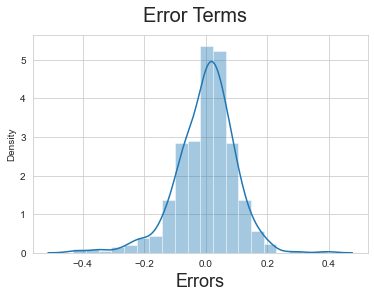

In [76]:
#plot the histogram for Residual Analysis

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Prediction Using The Final Model ###

So far, we have fitted the model and checked the normality of error terms as well. 
Let's now make predictions using the final model.

In [77]:
#Let's apply scalling on the continous varibales (temp, humidity, windspeed, count) of test set

con_vars = ['temp', 'windspeed', 'humidity', 'count']
bike_test[con_vars] = scaler.transform(bike_test[con_vars])




#### Dividing into X_test and y_test ####

In [78]:
y_test = bike_test.pop('count')
X_test = bike_test

In [79]:
#Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping varibales from X_test
X_test_new = X_test[X_train_new.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,holiday,temp,season_spring,season_winter,year_2019,month_Jul,month_Sep,weather_light snow and rain,weather_mist and cloudy
184,1.0,1,0.831783,0,0,0,1,0,0,1
535,1.0,0,0.901354,0,0,1,0,0,0,0
299,1.0,0,0.511964,0,1,0,0,0,0,1
221,1.0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0.817246,0,0,0,0,0,0,0


In [80]:
#making Prediction

y_pred = lm8.predict(X_test_new)
y_pred.head()

184    0.338011
535    0.851534
299    0.410836
221    0.609092
152    0.578866
dtype: float64

### Model Evaluation ###

Let's Evaluate the model using the y_test against the y_pred values to see the spread of the values

Text(0, 0.5, 'y_pred')

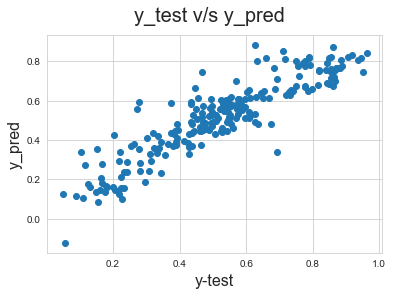

In [81]:
# Plot y_test and y-pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test v/s y_pred', fontsize= 20)

plt.xlabel('y-test', fontsize= 16)
plt.ylabel('y_pred', fontsize= 16)

<b> Predicted values have a linear relationship with actual values </b>

#### Calculating R-squared value for test set ####

In [82]:
#import R_square library

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8096078487662726

#### Calculating Adjusted R-square value for test set ####

In [83]:
n = X_test_new.shape[0] #n = number of rows

p = X_test_new.shape[1] #p = number of independent varibale

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.8004981764584387

In [85]:
#Calculating the Mean Square Error(MSE), Root Mean Square Error(RMSE),
# Mean Absolute Error(MAE) :

from sklearn import metrics

print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))


MSE :  0.009103463535116919
RMSE :  0.09541207227136889
MAE :  0.07199702480526322


<b> Comparision between The R_square and Adjusted R_Square of train and test sets </b>

<b> R-Squared Value:
    </b>
    

    
    


- Train Set : <b>82.2%  </b>

- Test Set  : <b>81%  </b>

<b> Adj R-Squared Value:
    </b>
    

    
    


- Train Set : <b>82%</b>

- Test Set  : <b>80.04% </b>

- As we can see that <b> the difference between the R-squared value of train and test dataset is not less than 2%, hence we can say that this is a good model. </b>

- As we can see that <b> the difference between the Adj R-squared value of train and test dataset is close to 2%, hence seeing this we can say that this is a good model. </b>

### Reporting of Final Model: ###


<b> From the coefficient values the Linear Regression Equation we get :
    
Count </b>=  0.1259 - 0.1006 * <b>`holiday`</b> + 0.4695 * <b>`temp`</b> - 0.1122 * <b>`season_spring`</b> + 0.0534 * <b>`season_winter`</b> + 0.2332 * <b>`year_2019`</b> - 0.0690 * <b>`month_Jul`</b> + 0.0654 * <b>month_Sep</b> - 0.2993 * <b>`low snow and rain`</b> - 0.0781 * <b>`mist and cloudy`</b>





From the regression model-8, we have the following variables and their respective coefficients which are significant in predicting the demand for shared bikes:

- holiday =	-0.1006	
- temp	  =  0.4695	
- season_spring  =	-0.1122	
- season_winter  =  0.0534	
- year_2019	  =  0.2332	
- month_Jul	  = -0.0690	
- month_Sep	  =  0.0654	
- light snow and rain  = -0.2993	
- mist and cloudy	   = -0.0781

<b> Top three most significant variables affecting the demand for the shared bikes are: </b>


- <b>temprature</b>


- <b>season winter</b>


- <b>year 2019</b>
 
 
 
 
 
 Since these three variables have positive correlation with count which means increment in these variables will lead to demand for shared bikes.